# Lecture 3: Linear Regression

Our previous lecture defined the task of supervised learning. In this lecture, we will now define our first supervised learning algorithm---ordinary least squares (OLS). The OLS algorithm performs linear regression---it fits a linear model to a regression dataset.

# 3.1. Calculus Review

Before we present our first supervised learning algorithm, we will do a quick calculus review.

### Recall: Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \underbrace{\text{Dataset}}_\text{Features, Attributes, Targets} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

## 3.1.1. Optimization

Recall that a key part of a supervised learning algorithm is the optimizer, which takes 

* an objective $J$ (also called a loss function) and 
* a model class $\mathcal{M}$ 

It outputs a model $f \in \mathcal{M}$ with the smallest value of the objective $J$.

\begin{align*}
\min_{f \in \mathcal{M}} J(f)
\end{align*}

Intuitively, this is the function that bests "fits" the data on the training dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

We will need several tools from calculus to define an optimizer.

We will use the a quadratic function as our running example for an objective $J$.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

In [28]:
def quadratic_function(theta):
    """The cost function, J(theta)."""
    return 0.5*(2*theta-1)**2

We can visualize it.

Text(0.5, 1.0, 'Simple quadratic function')

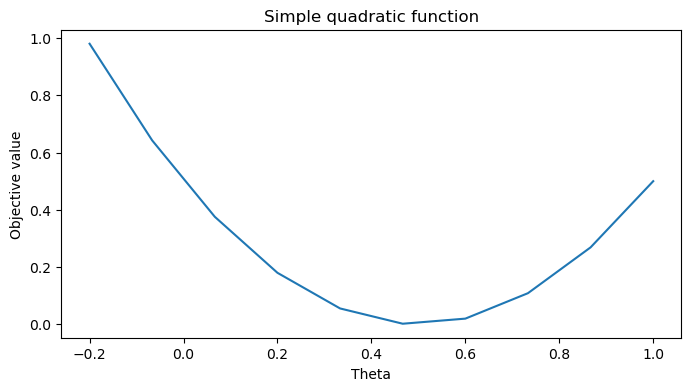

In [29]:
# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.
thetas = np.linspace(-0.2,1,10)
f_vals = quadratic_function(thetas[:,np.newaxis])

plt.plot(thetas, f_vals)
plt.xlabel('Theta')
plt.ylabel('Objective value')
plt.title('Simple quadratic function')

## 3.1.3. Calculus Review: Derivatives and Gradients

The key tool from calculus that we will use is the derivative and its extensions

### 3.1.3.1. Derivatives

Recall that the derivative $$\frac{d f(\theta_0)}{d \theta}$$ of a univariate function $f : \mathbb{R} \to \mathbb{R}$ is the instantaneous rate of change of the function $f(\theta)$ with respect to its parameter $\theta$ at the point $\theta_0$.

The code below visualizes several derivatives of the quadratic function. Note that the derivatives are the slopes of the tangents at various points of the curve.

Text(0.5, 1.0, 'Simple quadratic function')

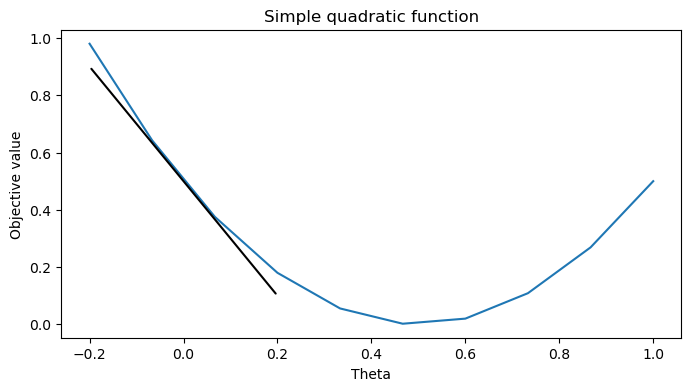

In [30]:
def quadratic_derivative(theta):
    return (2*theta-1)*2

df0 = quadratic_derivative(np.array([[0]])) # derivative at zero
f0 = quadratic_function(np.array([[0]]))
line_length = 0.2

plt.plot(thetas, f_vals)
plt.annotate('', xytext=(0-line_length, f0-line_length*df0), xy=(0+line_length, f0+line_length*df0),
             arrowprops={'arrowstyle': '-', 'lw': 1.5}, va='center', ha='center')
plt.xlabel('Theta')
plt.ylabel('Objective value')
plt.title('Simple quadratic function')

Text(0.5, 1.0, 'Simple quadratic function')

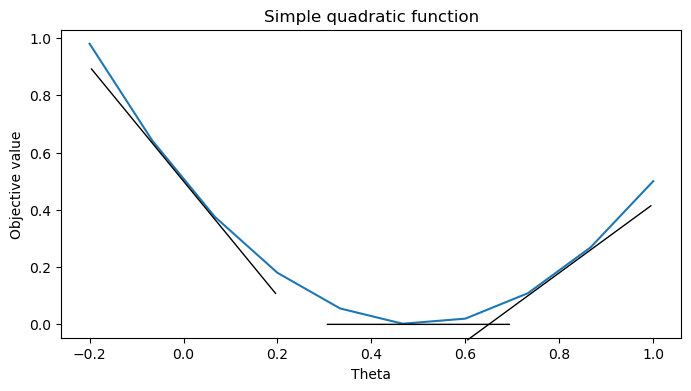

In [31]:
pts = np.array([[0, 0.5, 0.8]]).reshape((3,1))
df0s = quadratic_derivative(pts)
f0s = quadratic_function(pts)

plt.plot(thetas, f_vals)
for pt, f0, df0 in zip(pts.flatten(), f0s.flatten(), df0s.flatten()): 
    plt.annotate('', xytext=(pt-line_length, f0-line_length*df0), xy=(pt+line_length, f0+line_length*df0),
             arrowprops={'arrowstyle': '-', 'lw': 1}, va='center', ha='center')
plt.xlabel('Theta')
plt.ylabel('Objective value')
plt.title('Simple quadratic function')

### 3.1.3.2. Partial Derivatives

The partial derivative $$\frac{\partial f(\theta)}{\partial \theta_j}$$ of a multivariate function $f : \mathbb{R}^d \to \mathbb{R}$ is the derivative of $f$ with respect to $\theta_j$ while all the other dimensions $\theta_k$ for $k\neq j$ are fixed.

### 3.1.3.3. The Gradient

The gradient $\nabla f$ is the vector of all the partial derivatives:

$$ \nabla f (\theta) = \begin{bmatrix}
\frac{\partial f(\theta)}{\partial \theta_1} \\
\frac{\partial f(\theta)}{\partial \theta_2} \\
\vdots \\
\frac{\partial f(\theta)}{\partial \theta_d}
\end{bmatrix}.$$

The $j$-th entry of the vector $\nabla f (\theta)$ is the partial derivative $\frac{\partial f(\theta)}{\partial \theta_j}$ of $f$ with respect to the $j$-th component of $\theta$.

We will use a quadratic function as a running example. We define this function in 2D below.

In [32]:
def quadratic_function2d(theta0, theta1):
    """Quadratic objective function, J(theta0, theta1).
    
    The inputs theta0, theta1 are 2d arrays and we evaluate
    the objective at each value theta0[i,j], theta1[i,j].
    We implement it this way so it's easier to plot the
    level curves of the function in 2d.

    Parameters:
    theta0 (np.array): 2d array of first parameter theta0
    theta1 (np.array): 2d array of second parameter theta1
    
    Returns:
    fvals (np.array): 2d array of objective function values
        fvals is the same dimension as theta0 and theta1.
        fvals[i,j] is the value at theta0[i,j] and theta1[i,j].
    """
    theta0 = np.atleast_2d(np.asarray(theta0))
    theta1 = np.atleast_2d(np.asarray(theta1))
    return 0.5*((2*theta1-2)**2 + (theta0-3)**2)

Let's visualize this function. What you see below are the level curves: the value of the function is constant along each curve.

(-4.0, 7.0, -1.0, 4.0)

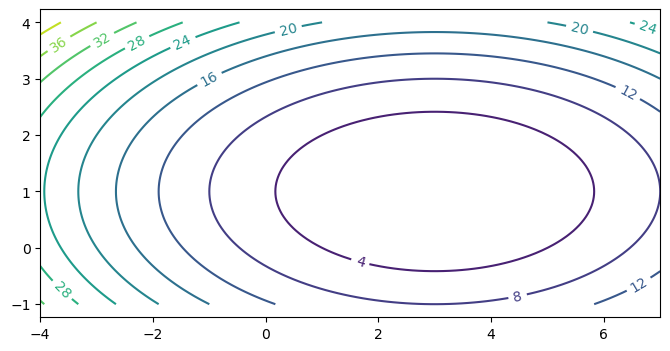

In [33]:
theta0_grid = np.linspace(-4,7,101)
theta1_grid = np.linspace(-1,4,101)
theta_grid = theta0_grid[np.newaxis,:], theta1_grid[:,np.newaxis]
J_grid = quadratic_function2d(theta0_grid[np.newaxis,:], theta1_grid[:,np.newaxis])

X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = plt.contour(X, Y, J_grid, 10)
plt.clabel(contours)
plt.axis('equal')

Let's write down the derivative of the quadratic function.

In [34]:
def quadratic_derivative2d(theta0, theta1):
    """Derivative of quadratic objective function.
    
    The inputs theta0, theta1 are 1d arrays and we evaluate
    the derivative at each value theta0[i], theta1[i].

    Parameters:
    theta0 (np.array): 1d array of first parameter theta0
    theta1 (np.array): 1d array of second parameter theta1
    
    Returns:
    grads (np.array): 2d array of partial derivatives
        grads is of the same size as theta0 and theta1
        along first dimension and of size
        two along the second dimension.
        grads[i,j] is the j-th partial derivative 
        at input theta0[i], theta1[i].
    """
    # this is the gradient of 0.5*((2*theta1-2)**2 + (theta0-3)**2)
    grads = np.stack([theta0-3, (2*theta1-2)*2], axis=1)
    grads = grads.reshape([len(theta0), 2])
    return grads

We can visualize the gradient. In two dimensions, the gradient can be visualized as an arrow. Note that the gradient is always orthogonal to the level curves (it's something you prove in a Calculus 3 course).

(-4.0, 7.0, -1.0, 4.0)

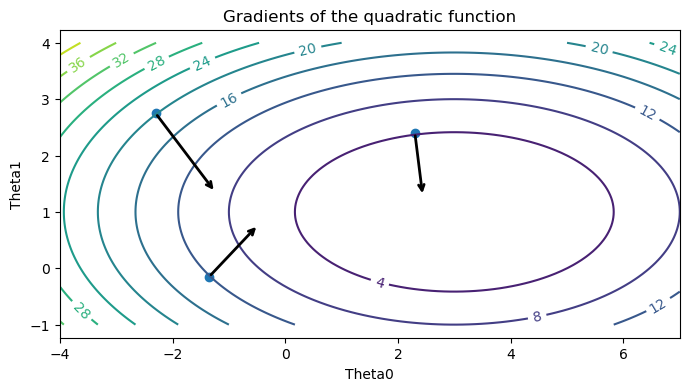

In [35]:
theta0_pts, theta1_pts = np.array([2.3, -1.35, -2.3]), np.array([2.4, -0.15, 2.75])
dfs = quadratic_derivative2d(theta0_pts, theta1_pts)
line_length = 0.2

contours = plt.contour(X, Y, J_grid, 10)
for theta0_pt, theta1_pt, df0 in zip(theta0_pts, theta1_pts, dfs):
    plt.annotate('', xytext=(theta0_pt, theta1_pt), 
                     xy=(theta0_pt-line_length*df0[0], theta1_pt-line_length*df0[1]),
                     arrowprops={'arrowstyle': '->', 'lw': 2}, va='center', ha='center')
plt.scatter(theta0_pts, theta1_pts)
plt.clabel(contours)
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Gradients of the quadratic function')
plt.axis('equal')

## 3.3. Gradient Descent

Next, we will use gradients to define an important algorithm called *gradient descent*. 

### 3.3.1. Intuition

Gradient descent is a very common optimization algorithm used in machine learning.

The intuition behind gradient descent is to repeatedly obtain the gradient to determine the direction in which the function decreases most steeply and take a step in that direction.

### 3.3.2. Notation

More formally, if we want to optimize $J(\theta)$, we start with an initial guess $\theta_0$ for the parameters and repeat the following update until $\theta$ is no longer changing:
$$ \theta_i := \theta_{i-1} - \alpha \cdot \nabla J(\theta_{i-1}). $$

In code, this method may look as follows:
```python
theta, theta_prev = random_initialization()
while norm(theta - theta_prev) > convergence_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * gradient(theta_prev)
```
In the above algorithm, we stop when $||\theta_i - \theta_{i-1}||$ is small.

It's easy to implement this function in `numpy`.

In [36]:
convergence_threshold = 2e-1
step_size = 2e-1
theta, theta_prev = np.array([[-2], [3]]), np.array([[0], [0]])
opt_pts = [theta.flatten()]
opt_grads = []

while np.linalg.norm(theta - theta_prev) > convergence_threshold:
    # we repeat this while the value of the function is decreasing
    theta_prev = theta
    gradient = quadratic_derivative2d(*theta).reshape([2,1])
    theta = theta_prev - step_size * gradient
    opt_pts += [theta.flatten()]
    opt_grads += [gradient.flatten()]

We can now visualize gradient descent.

(-4.0, 7.0, -1.0, 4.0)

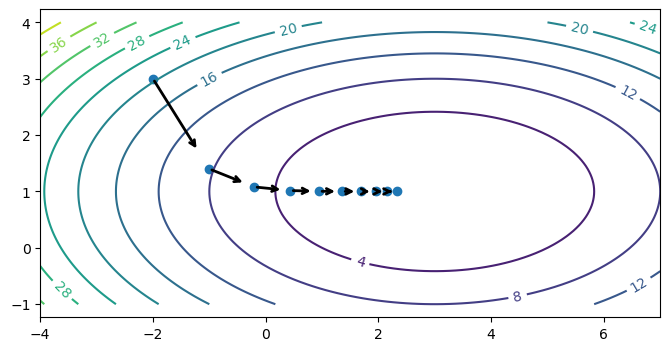

In [37]:
opt_pts = np.array(opt_pts)
opt_grads = np.array(opt_grads)

contours = plt.contour(X, Y, J_grid, 10)
plt.clabel(contours)
plt.scatter(opt_pts[:,0], opt_pts[:,1])

for opt_pt, opt_grad in zip(opt_pts, opt_grads):
    plt.annotate('', xytext=(opt_pt[0], opt_pt[1]), 
                 xy=(opt_pt[0]-0.8*step_size*opt_grad[0], opt_pt[1]-0.8*step_size*opt_grad[1]),
                 arrowprops={'arrowstyle': '->', 'lw': 2}, va='center', ha='center')

plt.axis('equal')

Each gradient is orthogonal to the level curve, and the minus one times the gradient (the "steepest descent direction") points inwards toward the minimum. By repeatedly following the steepest descent direction, we arrive at the minimum.

# 3.2. Gradient Descent in Linear Models

To better understand gradients and gradient descent, let's further explore their properties in the context of linear models.

Specifically, we will define a combination of model class, objective, and optimizer---this will give us our first supervised learning algorithm.


#### Gradient Descent Recap

A key ingredient will be gradient descent. Recall that if we want to optimize $J(\theta)$, we start with an initial guess $\theta_0$ for the parameters and repeat the following update:
$$ \theta_i := \theta_{i-1} - \alpha \cdot \nabla_\theta J(\theta_{i-1}). $$

As code, this method may look as follows:
```python
theta, theta_prev = random_initialization()
while norm(theta - theta_prev) > convergence_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * gradient(theta_prev)
```

## 3.1. A Supervised Learning Task: Predicting Diabetes

In this section, we are going to again use the UCI Diabetes Dataset.
* For each patient we have a access to their BMI and an estimate of diabetes risk (from 0-400).
* We are interested in understanding how BMI affects an individual's diabetes risk.

Text(0, 0.5, 'Diabetes Risk')

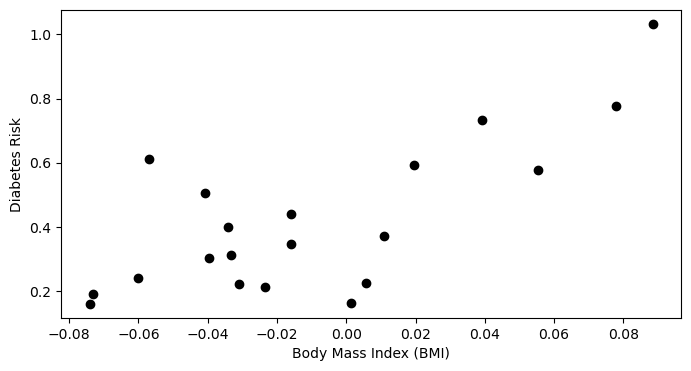

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# add an extra column of onens
X['one'] = 1

# Collect 20 data points and only use bmi dimension
X_train = X.iloc[-20:].loc[:, ['bmi', 'one']]
y_train = y.iloc[-20:] / 300

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

## 3.2. Linear Model Family

Recall that a linear model has the form
\begin{align*}
y & = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d
\end{align*}
where $x \in \mathbb{R}^d$ is a vector of features and $y$ is the target. The $\theta_j$ are the *parameters* of the model.

By using the notation $x_0 = 1$, we can represent the model in a vectorized form
$$ f_\theta(x) = \sum_{j=0}^d \theta_j \cdot x_j = \theta^\top x. $$

Let's define our model in Python.

In [39]:
def f(X, theta):
    """The linear model we are trying to fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional data matrix
    
    Returns:
    y_pred (np.array): n-dimensional vector of predicted targets
    """
    return X.dot(theta)

## 3.3. An Objective: Mean Squared Error

We pick $\theta$ to minimize the mean squared error (MSE). Slight variants of this objective are also known as the residual sum of squares (RSS) or the sum of squared residuals (SSR).
$$J(\theta)= \frac{1}{2n} \sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$
In other words, we are looking for the best compromise in $\theta$ over all the data points.

Let's implement the mean squared error.

In [40]:
def mean_squared_error(theta, X, y):
    """The cost function, J, describing the goodness of fit.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return 0.5*np.mean((y-f(X, theta))**2)

### 3.3.1. Mean Squared Error: Derivatives and Gradients

Let's work out the derivatives for $\frac{1}{2} \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2,$ the MSE of a linear model $f_\theta$ for one training example $(x^{(i)}, y^{(i)})$, which we denote $J^{(i)}(\theta)$.

\begin{align*}
\frac{\partial}{\partial \theta_j} J^{(i)}(\theta) & = \frac{\partial}{\partial \theta_j} \left(\frac{1}{2} \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2\right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot \frac{\partial}{\partial \theta_j} \left( f_\theta(x^{(i)}) - y^{(i)} \right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot \frac{\partial}{\partial \theta_j} \left( \sum_{k=0}^d \theta_k \cdot x^{(i)}_k - y^{(i)} \right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_j
\end{align*}

We can use this derivation to obtain an expression for the gradient of the MSE for a linear model

\begin{align*}
\small
{\tiny \nabla_\theta J^{(i)} (\theta)} = \begin{bmatrix}
\frac{\partial J^{(i)}(\theta)}{\partial \theta_0} \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\begin{bmatrix}
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_0 \\
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_1 \\
\vdots \\
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_d
\end{bmatrix}
=
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}
\end{align*}

Note that the MSE over the entire dataset is $J(\theta) = \frac{1}{n}\sum_{i=1}^n J^{(i)}(\theta)$. Therefore:

\begin{align*}
\nabla_\theta J (\theta) = \begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_0} \\
\frac{\partial J(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\frac{1}{n}\sum_{i=1}^n
\begin{bmatrix}
\frac{\partial J^{(i)}(\theta)}{\partial \theta_0} \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\frac{1}{n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}
\end{align*}

Let's implement this gradient.

In [41]:
def mse_gradient(theta, X, y):
    """The gradient of the cost function.
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    
    Returns:
    grad (np.array): d-dimensional gradient of the MSE
    """
    return np.mean((f(X, theta) - y) * X.T, axis=1)

## 3.4. Gradient Descent for Linear Regression

Putting this together with the gradient descent algorithm, we obtain a learning method for training linear models.


```python
theta, theta_prev = random_initialization()
while abs(J(theta) - J(theta_prev)) > conv_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * (f(x, theta)-y) * x
```

This update rule is also known as the Least Mean Squares (LMS) or Widrow-Hoff learning rule.

In [42]:
threshold = 1e-3
step_size = 4e-1
theta, theta_prev = np.array([2,1]), np.ones(2,)
opt_pts = [theta]
opt_grads = []
iter = 0

while np.linalg.norm(theta - theta_prev) > threshold:
    if iter % 100 == 0:
        print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(theta, X_train, y_train)))
    theta_prev = theta
    gradient = mse_gradient(theta, X_train, y_train)
    theta = theta_prev - step_size * gradient
    opt_pts += [theta]
    opt_grads += [gradient]
    iter += 1

Iteration 0. MSE: 0.171729
Iteration 100. MSE: 0.014765
Iteration 200. MSE: 0.014349
Iteration 300. MSE: 0.013997
Iteration 400. MSE: 0.013701


This procedure yields a first concrete example of a supervised learning algorithm. The final weights returned by the above algorithm yield a model, which we can visualize below.

Text(0, 0.5, 'Diabetes Risk')

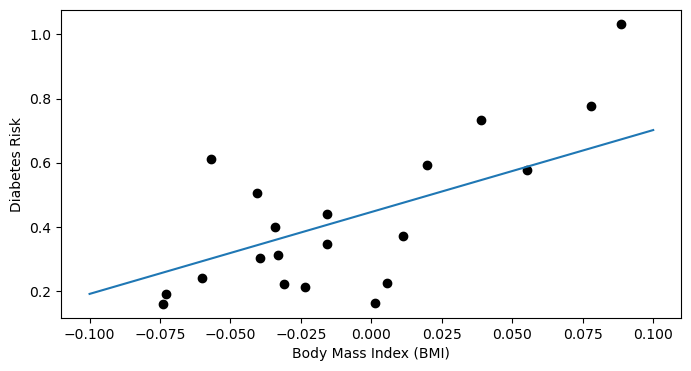

In [43]:
x_line = np.stack([np.linspace(-0.1, 0.1, 10), np.ones(10,)])
y_line = opt_pts[-1].dot(x_line)

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.plot(x_line[0], y_line)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

Note that the result is similar to what we obtained in the previous lecture by invoking the optimizer in `scikit-learn`.

# 3.3. Ordinary Least Squares

In practice, there is a more effective way than gradient descent to find linear model parameters.

This method will produce our first non-toy supervised learning algorithm: Ordinary Least Squares.

#### Review: The Gradient

The gradient $\nabla_\theta f$ further extends the derivative to multivariate functions $f : \mathbb{R}^d \to \mathbb{R}$, and is defined at a point $\theta_0$ as

$$ \nabla_\theta f (\theta_0) = \begin{bmatrix}
\frac{\partial f(\theta_0)}{\partial \theta_1} \\
\frac{\partial f(\theta_0)}{\partial \theta_2} \\
\vdots \\
\frac{\partial f(\theta_0)}{\partial \theta_d}
\end{bmatrix}.$$

In other words, the $j$-th entry of the vector $\nabla_\theta f (\theta_0)$ is the partial derivative $\frac{\partial f(\theta_0)}{\partial \theta_j}$ of $f$ with respect to the $j$-th component of $\theta$.

## 3.3.1. Notation

First, we start by introducing some notation.
Suppose that we have a dataset of size $n$ (e.g., $n$ patients), indexed by $i=1,2,...,n$. Each $x^{(i)}$ is a vector of $d$ features.

### 3.3.1.1. Design Matrix

Machine learning algorithms are most easily defined in the language of linear algebra. Therefore, it will be useful to represent the entire dataset as one matrix $X \in \mathbb{R}^{n \times d}$, of the form:

$$ X = \begin{bmatrix}
x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots \\
x^{(n)}_1 & x^{(n)}_2 & \ldots & x^{(n)}_d
\end{bmatrix}
=
\begin{bmatrix}
- & (x^{(1)})^\top & - \\
- & (x^{(2)})^\top & - \\
& \vdots & \\
- & (x^{(n)})^\top & - \\
\end{bmatrix}
.$$

We can view the design matrix for the diabetes dataset.

In [44]:
X_train.head()

,bmi,one
422,0.077863,1
423,-0.039618,1
424,0.011039,1
425,-0.040696,1
426,-0.034229,1


### 3.3.1.2. The Target Vector


Similarly, we can vectorize the target variables into a vector $y \in \mathbb{R}^n$ of the form
$$ y = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(n)}
\end{bmatrix}.$$

### 3.3.1.3. Squared Error in Matrix Form

Recall that we may fit a linear model by choosing $\theta$ that minimizes the squared error:
$$J(\theta)=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$

We can write this sum in matrix-vector form as:
$$J(\theta) = \frac{1}{2} (y-X\theta)^\top(y-X\theta) = \frac{1}{2} \|y-X\theta\|^2,$$
where $X$ is the design matrix and $\|\cdot\|$ denotes the Euclidean norm.

## 3.3.2. The Normal Equations

Next, we will use this notation to derive a very important formula in supervised learning---the normal equations.

### 3.3.2.1. The Gradient of the Squared Error

Let's begin by observing that we can compute the gradient of the mean squared error as follows.

\begin{align*}
\nabla_\theta J(\theta) 
& = \nabla_\theta \frac{1}{2} (X \theta - y)^\top  (X \theta - y) \\
& = \frac{1}{2} \nabla_\theta \left( (X \theta)^\top  (X \theta) - (X \theta)^\top y - y^\top (X \theta) + y^\top y \right) \\
& = \frac{1}{2} \nabla_\theta \left( \theta^\top  (X^\top X) \theta - 2(X \theta)^\top y \right) \\
& = \frac{1}{2} \left( 2(X^\top X) \theta - 2X^\top y \right) \\
& = (X^\top X) \theta - X^\top y
\end{align*}

We used the facts that $a^\top b = b^\top a$ (line 3), that $\nabla_x b^\top x = b$ (line 4), and that $\nabla_x x^\top A x = 2 A x$ for a symmetric matrix $A$ (line 4).

### 3.3.2.2. Computing Model Parameters via the Normal Equations

We know from calculus that a function is minimized when its derivative is set to zero. In our case, our objective function is a (multivariate) quadratic; hence it only has one minimum, which is the global minimum.

Setting the above derivative to zero, we obtain the *normal equations*:
$$ (X^\top X) \theta = X^\top y.$$

Hence, the value $\theta^*$ that minimizes this objective is given by:
$$ \theta^* = (X^\top X)^{-1} X^\top y.$$

Note that we assumed that the matrix $(X^\top X)$ is invertible; we will soon see a simple way of dealing with non-invertible matrices.

We also add a few important remarks:

* The formula $\theta^* = (X^\top X)^{-1} X^\top y$ yields an *analytical formula* for the parameters that minimize our mean squared error objective. 
* In contrast, gradient descent is an iterative optimization procedure that is often slower on small datasets.
* The analytical approach is what is most commonly used in practice.

#### A Small Experiment

Let's now apply the normal equations to the Diabetes dataset.

Text(0, 0.5, 'Diabetes Risk')

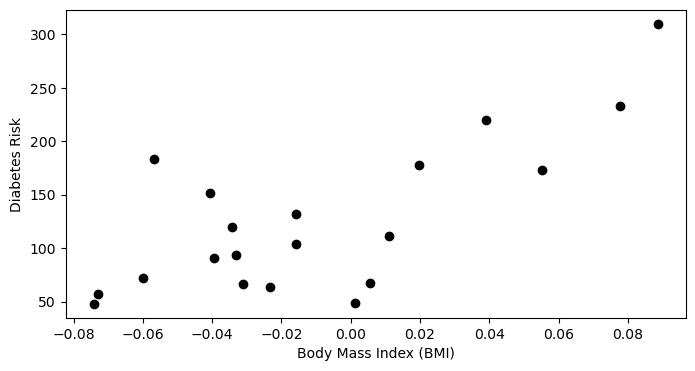

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# add an extra column of onens
X['one'] = 1

# Collect 20 data points
X_train = X.iloc[-20:]
y_train = y.iloc[-20:]
plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

In [48]:
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
theta_best_df = pd.DataFrame(data=theta_best[np.newaxis, :], columns=X.columns)
theta_best_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,one
0,-3.797822,204.775932,-64.275792,-263.01616,14008.122523,-11802.044811,-5893.847369,-1137.012428,-2737.876706,-394.034371,155.705025


The above dataframe contains the parameters thetea that minimize the mean squared error objective.

We can now use our estimate of theta to compute predictions for 3 new data points.

In [49]:
# Collect 3 data points for testing
X_test = X.iloc[:3]
y_test = y.iloc[:3]

# generate predictions on the new patients
y_test_pred = X_test.dot(theta_best)

Let's visualize these predictions.

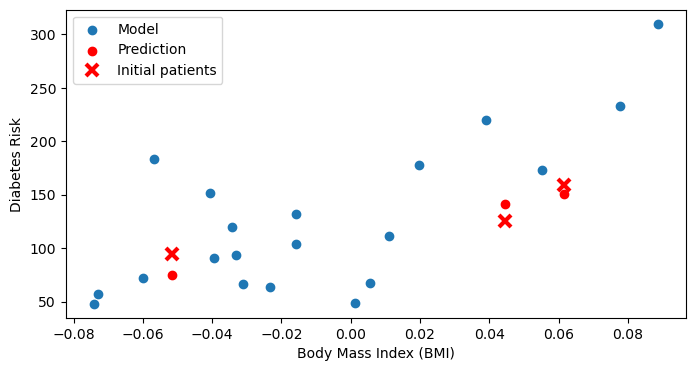

In [ ]:
# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_train.loc[:, ['bmi']], y_train)
plt.scatter(X_test.loc[:, ['bmi']], y_test, color='red', marker='o')
plt.plot(X_test.loc[:, ['bmi']], y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

Again, red cross are predictions, red dots are true values. The model gives us very accurate predictions.

Note again that while we are visualizing the data with the BMI on the x-axis, the model actually uses all of the features.

## 3.3.4. Ordinary Least Squares

The above procedure gives us our first non-toy supervised learning algorithm---ordinary least squares (OLS). We can succinctly define OLS in terms of the algorithm components we defined in the last lecture.

* __Type__: Supervised learning (regression)
* __Model family__: Linear models
* __Objective function__: Mean squared error
* __Optimizer__: Normal equations

We will define many algorithms in this way throughout the course.

# 3.4. Non-Linear Least Squares

Ordinary Least Squares can only learn linear relationships in the data. Can we also use it to model more complex relationships?

## 3.4.1. Review: Polynomial Functions


We start with a brief review of polynomials.
Recall that a polynomial of degree $p$ is a function of the form
$$
a_p x^p + a_{p-1} x^{p-1} + ... + a_{1} x + a_0.
$$

Below are some examples of polynomial functions.

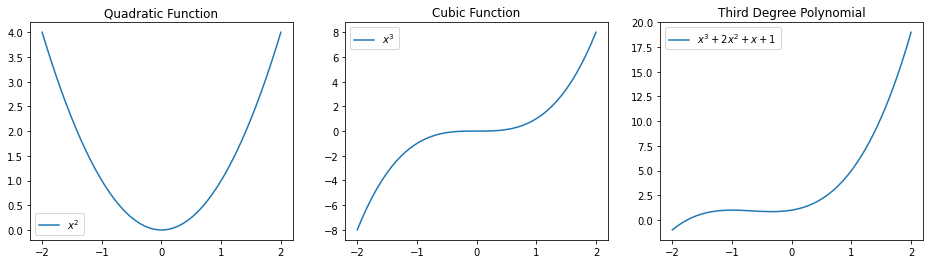

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(16,4))
x_vars = np.linspace(-2, 2)

plt.subplot('131')
plt.title('Quadratic Function')
plt.plot(x_vars, x_vars**2)
plt.legend(["$x^2$"])

plt.subplot('132')
plt.title('Cubic Function')
plt.plot(x_vars, x_vars**3)
plt.legend(["$x^3$"])

plt.subplot('133')
plt.title('Third Degree Polynomial')
plt.plot(x_vars, x_vars**3 + 2*x_vars**2 + x_vars + 1)
plt.legend(["$x^3 + 2 x^2 + x + 1$"])

## 3.4.2. Modeling Non-Linear Relationships With Polynomial Regression

Note that the set of $p$-th degree polynomials forms a linear model with parameters $a_p, a_{p-1}, ..., a_0$.
This means we can use our algorithms for linear models to learn non-linear features!

Specifically, given a one-dimensional continuous variable $x$, we can define the *polynomial feature* function $\phi : \mathbb{R} \to \mathbb{R}^{p+1}$ as
$$ \phi(x) = \begin{bmatrix}
1 \\
x \\
x^2 \\
\vdots \\
x^p
\end{bmatrix}.
$$

The class of models of the form
$$ f_\theta(x) := \sum_{j=0}^p \theta_p x^p = \theta^\top \phi(x) $$
with parameters $\theta$ and polynomial features $\phi$ is the set of $p$-degree polynomials.

* This model is non-linear in the input variable $x$, meaning that we can model complex data relationships.

* It is a linear model as a function of the parameters $\theta$, meaning that we can use our familiar ordinary least squares algorithm to learn these features.

### 3.4.2.1. Polynomial Features for Diabetes RIsk Prediction

In this section, we are going to again use the UCI Diabetes Dataset.

* For each patient we have a access to a measurement of their body mass index (BMI) and a quantitative diabetes risk score (from 0-300). 
* We are interested in understanding how BMI affects an individual's diabetes risk.

Text(0, 0.5, 'Diabetes Risk')

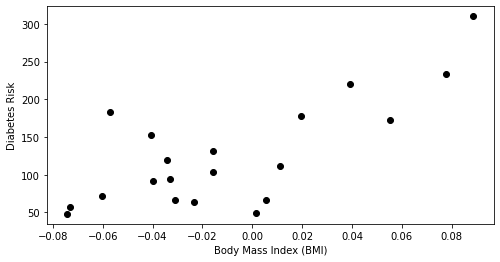

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import numpy as np
import pandas as pd
from sklearn import datasets

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# add an extra column of onens
X['one'] = 1

# Collect 20 data points
X_train = X.iloc[-20:]
y_train = y.iloc[-20:]

plt.scatter(X_train.loc[:,['bmi']], y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

Let's now obtain linear features for this dataset.

In [ ]:
X_bmi = X_train.loc[:, ['bmi']]

X_bmi_p3 = pd.concat([X_bmi, X_bmi**2, X_bmi**3], axis=1)
X_bmi_p3.columns = ['bmi', 'bmi2', 'bmi3']
X_bmi_p3['one'] = 1
X_bmi_p3.head()

,bmi,bmi2,bmi3,one
422,0.077863,0.006063,0.000472,1
423,-0.039618,0.001570,-0.000062,1
424,0.011039,0.000122,0.000001,1
425,-0.040696,0.001656,-0.000067,1
426,-0.034229,0.001172,-0.000040,1


### 3.4.2.2. Diabetes RIsk Prediction with Polynomial Regression

By training a linear model on this featurization of the diabetes dataset, we can obtain a polynomial model of diabetes risk as a function of BMI.

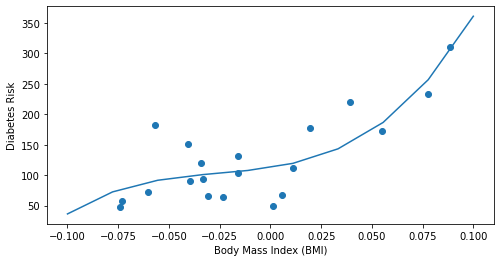

In [ ]:
# Fit a linear regression
theta = np.linalg.inv(X_bmi_p3.T.dot(X_bmi_p3)).dot(X_bmi_p3.T).dot(y_train)

# Show the learned polynomial curve
x_line = np.linspace(-0.1, 0.1, 10)
x_line_p3 = np.stack([x_line, x_line**2, x_line**3, np.ones(10,)], axis=1)
y_train_pred = x_line_p3.dot(theta)

plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(X_bmi, y_train)
plt.plot(x_line, y_train_pred)

Notice how the above third-degree polynomial represents a much better fit to the data!

## 3.4.3. Multivariate Polynomial Regression

We can construct non-linear functions of multiple variables by using multivariate polynomials.

For example, a polynomial of degree $2$ over two variables $x_1, x_2$ is a function of the form
<!-- $$
a_{20} x_1^2 + a_{10} x_1 + a_{02} x_2^2 + a_{01} x_2 + a_{22} x_1^2 x_2^2 + a_{21} x_1^2 x_2 + a_{12} x_1 x_2^2 + a_11 x_1 x_2 + a_{00}.
$$ -->
$$
a_{20} x_1^2 + a_{10} x_1 + a_{02} x_2^2 + a_{01} x_2 + a_{11} x_1 x_2 + a_{00}.
$$

In general, a polynomial of degree $p$ over two variables $x_1, x_2$ is a function of the form
$$
f(x_1, x_2) = \sum_{i,j \geq 0 : i+j \leq p} a_{ij} x_1^i x_2^j.
$$

In our two-dimensional example, this corresponds to a feature function $\phi : \mathbb{R}^2 \to \mathbb{R}^6$ of the form
$$ \phi(x) = \begin{bmatrix}
1 \\
x_1 \\
x_1^2 \\
x_2 \\
x_2^2 \\
x_1 x_2
\end{bmatrix}.
$$

The same approach can be used to specify polynomials of any degree and over any number of variables.

## 3.4.4. Non-Linear Least Squares

We can further extend this approach by going from polynomial to general non-linear features. Combining non-linear features with normal equations gives us an algorithm called non-linear least squares.

### 3.4.4.2. Towards General Non-Linear Features

Any non-linear feature map $\phi(x) : \mathbb{R}^d \to \mathbb{R}^p$ can be used to obtain general models of the form
$$ f_\theta(x) := \theta^\top \phi(x) $$
that are highly non-linear in $x$ but linear in $\theta$.

For example, here is a way of modeling complex periodic functions via a sum of sines and cosines.

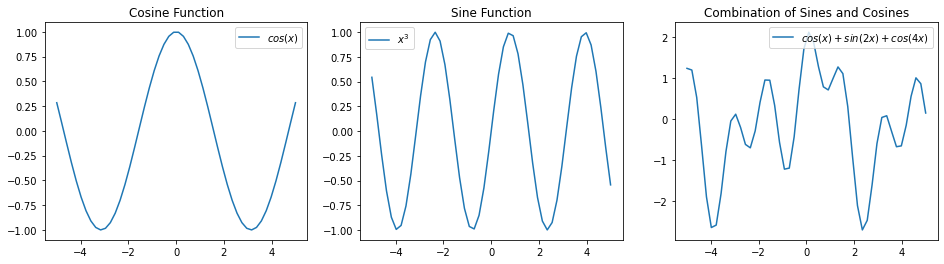

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(16,4))
x_vars = np.linspace(-5, 5)

plt.subplot('131')
plt.title('Cosine Function')
plt.plot(x_vars, np.cos(x_vars))
plt.legend(["$cos(x)$"])

plt.subplot('132')
plt.title('Sine Function')
plt.plot(x_vars, np.sin(2*x_vars))
plt.legend(["$x^3$"])

plt.subplot('133')
plt.title('Combination of Sines and Cosines')
plt.plot(x_vars, np.cos(x_vars) + np.sin(2*x_vars) + np.cos(4*x_vars))
plt.legend(["$cos(x) + sin(2x) + cos(4x)$"])

### 3.4.4.2. Algorithm: Non-Linear Least Squares

Because the above model is still linear in $\theta$, we can apply the normal equations. This yields the following algorithm, which we again characterize via its components.

* __Type__: Supervised learning (regression)
* __Model family__: Linear in the parameters; non-linear with respect to raw inputs.
* __Features__: Non-linear functions of the attributes
* __Objective function__: Mean squared error
* __Optimizer__: Normal equations